In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib
import plotly.express as px
import plotly.graph_objs as go
import string
import re

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

In [ ]:

try:
    data = pd.read_csv(r'/content/employee_distribution.csv', encoding='latin1')
except UnicodeDecodeError:
    try:
        data = pd.read_csv(r'/content/employee_distribution.csv', encoding='windows-1252')
    except UnicodeDecodeError:
        data = pd.read_csv(r'/content/employee_distribution.csv', encoding='iso-8859-15')

<ipython-input-6-ef284d59448b>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap='Greens', shade=True, ax=axes[0, 1])
<ipython-input-6-ef284d59448b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap='Oranges', shade=True, ax=axes[0, 2])
<ipython-input-6-ef284d59448b>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap='Reds', shade=True, ax=axes[1, 0])
<ipython-input-6-ef284d59448b>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap='Purples', 

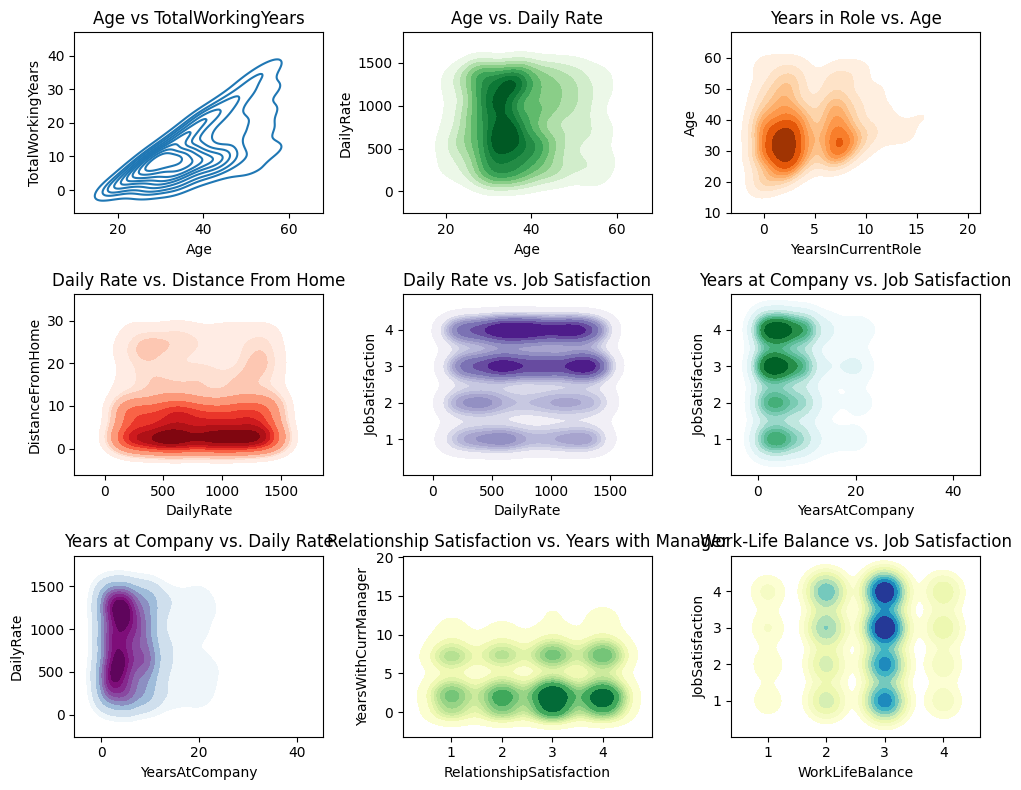

In [ ]:
fig,axes=plt.subplots(3,3,figsize=(10,8))
x=data['Age']
y=data['TotalWorkingYears']
sns.kdeplot(x=x,y=y,ax=axes[0,0])
axes[0,0].set_title('Age vs TotalWorkingYears')
x = data['Age']
y = data['DailyRate']
sns.kdeplot(x=x, y=y, cmap='Greens', shade=True, ax=axes[0, 1])
axes[0, 1].set_title('Age vs. Daily Rate')


x = data['YearsInCurrentRole']
y = data['Age']
sns.kdeplot(x=x, y=y, cmap='Oranges', shade=True, ax=axes[0, 2])
axes[0, 2].set_title('Years in Role vs. Age')


x = data['DailyRate']
y = data['DistanceFromHome']
sns.kdeplot(x=x, y=y, cmap='Reds', shade=True, ax=axes[1, 0])
axes[1, 0].set_title('Daily Rate vs. Distance From Home')


x = data['DailyRate']
y = data['JobSatisfaction']
sns.kdeplot(x=x, y=y, cmap='Purples', shade=True, ax=axes[1, 1])
axes[1, 1].set_title('Daily Rate vs. Job Satisfaction')


x = data['YearsAtCompany']
y = data['JobSatisfaction']
sns.kdeplot(x=x, y=y, cmap='BuGn', shade=True, ax=axes[1, 2])
axes[1, 2].set_title('Years at Company vs. Job Satisfaction')


x = data['YearsAtCompany']
y = data['DailyRate']
sns.kdeplot(x=x, y=y, cmap='BuPu', shade=True, ax=axes[2, 0])
axes[2, 0].set_title('Years at Company vs. Daily Rate')


x = data['RelationshipSatisfaction']
y = data['YearsWithCurrManager']
sns.kdeplot(x=x, y=y, cmap='YlGn', shade=True, ax=axes[2, 1])
axes[2, 1].set_title('Relationship Satisfaction vs. Years with Manager')


x = data['WorkLifeBalance']
y = data['JobSatisfaction']
sns.kdeplot(x=x, y=y, cmap='YlGnBu', shade=True, ax=axes[2, 2])
axes[2, 2].set_title('Work-Life Balance vs. Job Satisfaction')


fig.tight_layout()


plt.show()

In [ ]:
target = {'Yes': 1, 'No': 0}
data['Attrition_num'] = data['Attrition'].apply(lambda x: target.get(x))



In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [ ]:
target = {'Yes': 1, 'No': 0}

data['Overtime_Num'] = data['OverTime'].apply(lambda x: target.get(x))

In [ ]:
target = {'Y': 1, 'N': 0}

data['Over18_num'] = data['Over18'].apply(lambda x: target.get(x))

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num,Overtime_Num,Over18_num
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,0,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,1,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,0,1


In [ ]:
target = {'Travel_Rarely': 1, 'Travel_Frequently': 0}

data['Travel_num'] = data['BusinessTravel'].apply(lambda x: target.get(x))

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num,Overtime_Num,Over18_num,Travel_num
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,1,1,1,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,0,0,1,0.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,1,1,1,1.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,0,1,1,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,0,0,1,1.0


In [ ]:
new_data = data.drop(['Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus','Attrition','BusinessTravel','Over18','OverTime'], axis=1)

In [ ]:
new_data.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num,Overtime_Num,Over18_num,Travel_num
0,41,1102,1,2,1,1,2,94,3,2,...,0,1,6,4,0,5,1,1,1,1.0
1,49,279,8,1,1,2,3,61,2,2,...,3,3,10,7,1,7,0,0,1,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,3,3,0,0,0,0,1,1,1,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,3,3,8,7,3,0,0,1,1,0.0
4,27,591,2,1,1,7,1,40,3,1,...,3,3,2,2,2,2,0,0,1,1.0


In [ ]:
new_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_num',
       'Overtime_Num', 'Over18_num', 'Travel_num'],
      dtype='object')

In [ ]:
new_data.isnull().sum()

,0
Age,0
DailyRate,0
DistanceFromHome,0
Education,0
EmployeeCount,0
EmployeeNumber,0
EnvironmentSatisfaction,0
HourlyRate,0
JobInvolvement,0
JobLevel,0


In [ ]:
new_data_corr=new_data.corr()

In [ ]:
new_data_corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num,Overtime_Num,Over18_num,Travel_num
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205,0.028062,NaN,0.028280
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652,0.009135,NaN,0.010508
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924,0.025514,NaN,-0.009592
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373,-0.020322,NaN,0.008091
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577,-0.024037,NaN,0.004670
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369,0.070132,NaN,0.012866
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846,-0.007782,NaN,0.023044
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016,-0.003507,NaN,0.003262
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105,0.000544,NaN,0.024058


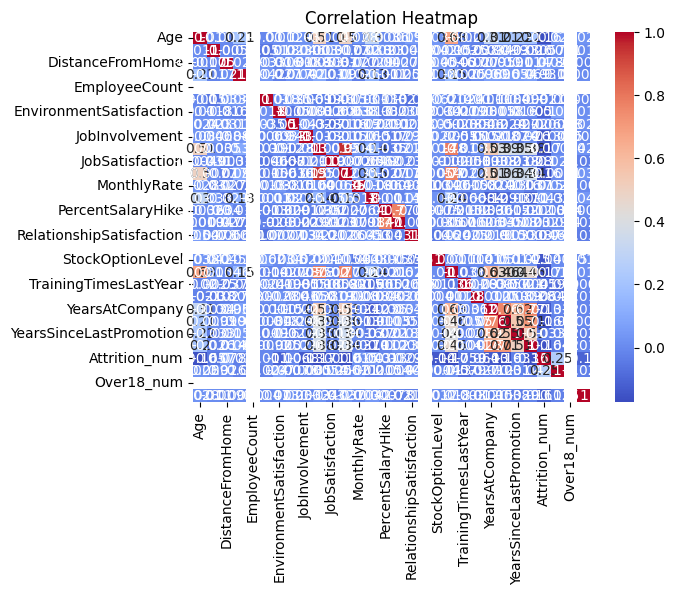

In [ ]:
sns.heatmap(new_data_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

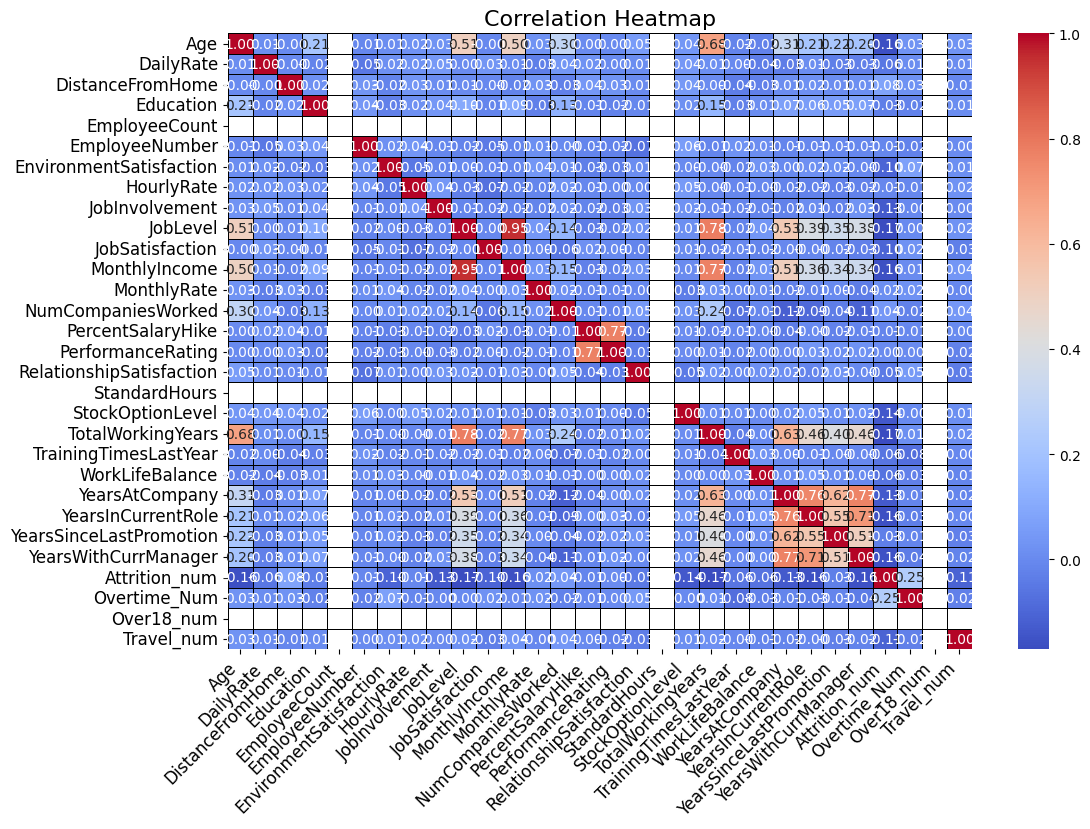

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))


sns.heatmap(new_data_corr,
            annot=True,
            cmap='coolwarm',
            annot_kws={"size": 10},
            fmt=".2f",
            linewidths=0.5,
            linecolor='black')

plt.title('Correlation Heatmap', fontsize=16)


plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)


plt.show()


In [ ]:
data = data.drop(['Attrition_num',	'Overtime_Num',	'Over18_num',	'Travel_num'], axis=1)



In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
character=[]
for col in data.columns:
    if data[col].dtype == 'object':
        character.append(col)

numerical = data.columns.difference(character)

In [ ]:
print(character[:5])


['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender']


In [ ]:
attrition_cat = data[character]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1)
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)
attrition_num = data[numerical]
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

In [ ]:
target_map = {'Yes':1, 'No':0}
target = data["Attrition"].apply(lambda x: target_map[x])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(attrition_final, target, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,bootstrap=True, max_leaf_nodes=None)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8673469387755102


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       411
           1       0.89      0.20      0.33        79

    accuracy                           0.87       490
   macro avg       0.88      0.60      0.63       490
weighted avg       0.87      0.87      0.83       490



In [ ]:
import numpy as np

y_pred_reshaped = y_pred.reshape(-1, 1) if hasattr(y_pred, 'reshape') else np.array(y_pred).reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1) if hasattr(y_test, 'reshape') else np.array(y_test).reshape(-1, 1)

# Concatenate along the second axis
print(np.concatenate((y_pred_reshaped, y_test_reshaped), axis=1))

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[409   2]
 [ 63  16]]


0.8673469387755102